<a href="https://colab.research.google.com/github/Massimo2003/BitcoinProject/blob/main/MarcheFinanciers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# DICO COLONNES: [DICO](https://coinmetrics.io/tools/)


**AdrActCnt**: sum of all adresses that are unique in the blockchain

**AdrBaUSDXCnt:** The sum count of unique addresses holding at least X dollar's worth of native units as of the end of that day

**BlkSizeMeanByte**: The mean size (in bytes) of all blocks created that interval.

**BlkCnt**: Number of blocks used at that time

**BlkWghtTot**: The mean weight of all blocks created that interval

**CapAct1yrUSD** : The sum USD value of all active native units in the last year. Native units that transacted more than once are only counted once.


**CapMVRVFF**: The ratio of the free float market capitalization (CapMrktFFUSD) to the sum "realized" USD value of the current supply (CapRealUSD).

**DiffLast**: The difficulty of the last block in the considered time period. Difficulty represents how hard it is to find a hash that meets the protocol-designated requirement (i.e., the difficulty of finding a new block) that day.

**FeeByteMeanNtv**:The mean transaction fee per byte of all blocks that interval in native units.

**FeeMeanUSD**: The USD value of the mean fee per transaction that interval.

**FeeTotNtv**: The sum USD value of all fees paid to miners, transaction validators, stakers and/or block producers that interval. 

**FlowInExUSD**:The sum USD value sent to exchanges that interval, excluding exchange to exchange activity.

**FlowOutExtUSD**: The sum USD value withdrawn from exchanges that day, excluding exchange to exchange activity

**HashRate**: The mean rate at which miners are solving hashes that day. Hash rate is the speed at which computations are being completed across all miners in the network.

**IssContPctDay :** The percentage of new native units (continuous) issued on that day divided by the current supply on that day. Also referred to as the daily inflation rate.

**IssTotUSD**:The sum USD value of all new native units issued that day.

**NDF**:The ratio of supply held by addresses with at least one ten-thousandth of the current supply of native units to the current supply.

**ROI1yr** :The return on investment for the asset assuming a purchase 12 months prior.

**ROI30d** :The return on investment for the asset assuming a purchase 30 days prior.
**ReferenceRateUSD**: Reference Rates are designed to represent the price of a cryptoasset in an arms length transaction between a willing buyer and willing seller. It is designed to reflect the price where the majority of trades took place for a given cryptoasset using multiple markets as input data sources.

**RevHashUSD:** The mean miner reward per estimated hash unit performed during the period, in native units. The unit of hashpower measurement depends on the protocol.

**Rev USD** : The sum USD value of all miner revenue (fees plus newly issued native units) .

SER: 
The ratio of supply held by addresses with less than one ten-millionth of the current supply of native units to the supply held by the top one percent of addresses.

SplyAct10yr:The sum of unique native units that transacted at least once in the trailing 10 Years up to that interval. Native units that transacted more than once are only counted once.

SplyAdrBalUSD1M: The sum of all native units being held in addresses whose balance was $1M or greater at the end of that day. Only native units are considered (e.g., an address with less than X ETH but with more than X in ERC-20 tokens would not be considered).

# DATAFRAMES


In [6]:
btc_data = pd.read_csv('btc.csv', parse_dates=True)

print('Dimension of dataframe:\n', btc_data.shape)
print('First 5 elements of dataframe:\n', btc_data.head(5))
print('Last 5 elements of dataframe:\n', btc_data.tail(5))
print('Type of elements in dataframe (info):\n', btc_data.info)

btc_data['time'] = pd.to_datetime(btc_data['time'])
btc_data['time'].dt.year.unique()
print('Type of elements in dataframe (dtypes):\n', btc_data.dtypes)

btc_data = btc_data.set_index('time')

print('First 5 elements of dataframe (time as index):\n',btc_data.head(5))
print('Time as index:\n', btc_data.index)
print('Values on 23/02/2022', btc_data.loc["2022-02-20"])
print('Values from 23/02/2022 to 25/02/2022', btc_data.loc["2022-02-23":"2022-02-25"])
print('Values for all the values of february', btc_data.loc["2022-02"])

Dimension of dataframe:
 (4846, 144)
First 5 elements of dataframe:
          time  AdrActCnt  AdrBal1in100KCnt  AdrBal1in100MCnt  AdrBal1in10BCnt  \
0  2009-01-03        0.0               0.0               0.0              0.0   
1  2009-01-04        0.0               0.0               0.0              0.0   
2  2009-01-05        0.0               0.0               0.0              0.0   
3  2009-01-06        0.0               0.0               0.0              0.0   
4  2009-01-07        0.0               0.0               0.0              0.0   

   AdrBal1in10KCnt  AdrBal1in10MCnt  AdrBal1in1BCnt  AdrBal1in1KCnt  \
0              0.0              0.0             0.0             0.0   
1              0.0              0.0             0.0             0.0   
2              0.0              0.0             0.0             0.0   
3              0.0              0.0             0.0             0.0   
4              0.0              0.0             0.0             0.0   

   AdrBal1in1MCnt

# **ANALYSES GRAPHIQUES**


Graphes comparant le nombres de blocks temporaires crées et le nombre d'adresses utilisées depuis la création du bitcoin

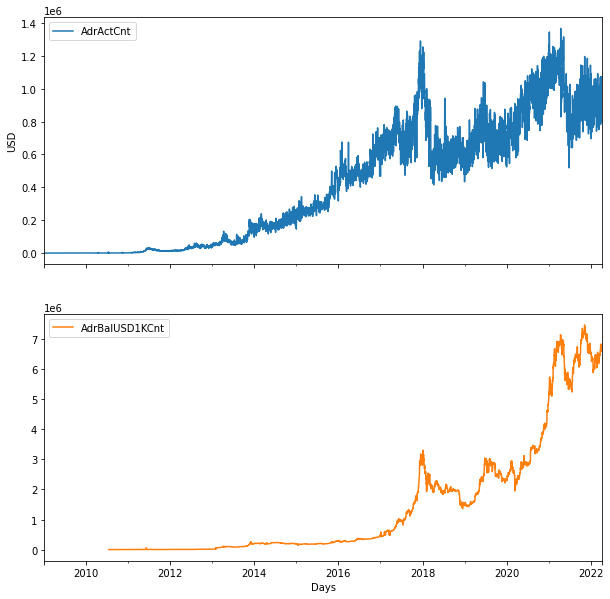

In [41]:
axes = btc_data[["AdrActCnt", "AdrBalUSD1KCnt"]].plot(subplots = True, figsize = (10, 10))
axes[0].set_ylabel('USD')
axes[1].set_xlabel("Days");

**Graphes comparant le nombres de blocks temporaires crées et le nombre d'adresses utilisées  ainsi que le prix du bitcoin depuis la création du bitcoin**

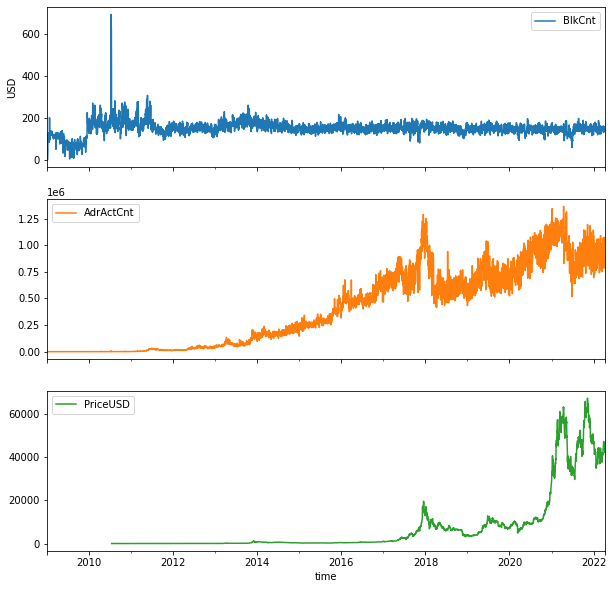

In [40]:
axes = btc_data[["BlkCnt", "AdrActCnt","PriceUSD"]].plot(subplots = True, figsize = (10, 10))
axes[0].set_ylabel('USD')
axes[1].set_xlabel("Days");

Comparaison du prix, adresses et block entre le 2010-07-01 et le 2010-07-22

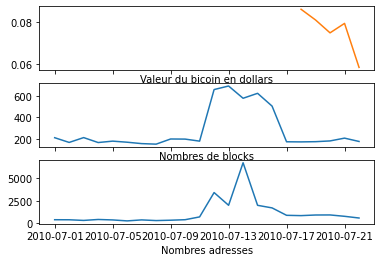

In [9]:
fig,(ax1,ax2,ax3)= plt.subplots(3, sharex=True)
ax1.plot(btc_data.loc["2010-07-01":"2010-07-22", "PriceUSD"] ,'tab:orange')   
ax1.set_xlabel("Valeur du bicoin en dollars");
ax2.plot(btc_data.loc["2010-07-01":"2010-07-22", "BlkCnt"])
ax2.set_xlabel("Nombres de blocks");
ax3.plot(btc_data.loc["2010-07-01":"2010-07-22", "AdrActCnt"])
ax3.set_xlabel("Nombres adresses");

# **Boxplot**

Box plots comparant le nombres de blocks temporaires crées et le nombre d'adresses utilisées depuis la création du bitcoin

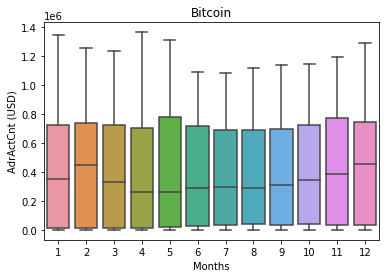

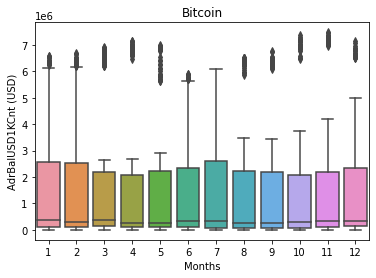

In [43]:
ax1 = sns.boxplot(data=btc_data, x=btc_data.index.month, y='AdrActCnt');
ax1.set_ylabel("AdrActCnt (USD)")
ax1.set_xlabel("Months")
ax1.set_title("Bitcoin");
plt.show()

ax2 = sns.boxplot(data=btc_data, x=btc_data.index.month, y='AdrBalUSD1KCnt');
ax2.set_ylabel("AdrBalUSD1KCnt (USD)")
ax2.set_xlabel("Months")
ax2.set_title("Bitcoin");

Box plots comparant le nombres de blocks temporaires crées et le nombre d'adresses utilisées ainsi que le prix du bitcoin depuis la création du bitcoin

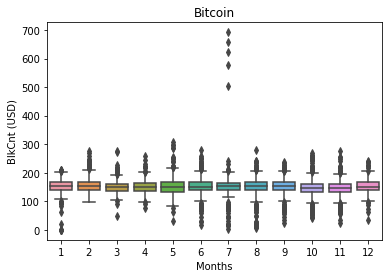

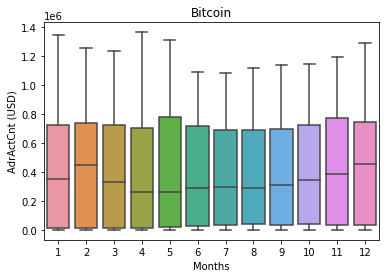

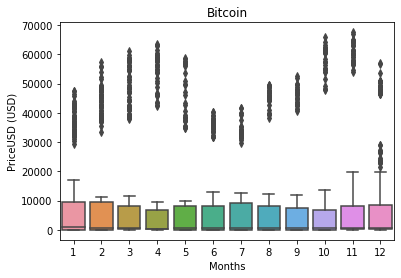

In [47]:
ax1 = sns.boxplot(data=btc_data, x=btc_data.index.month, y='BlkCnt');
ax1.set_ylabel("BlkCnt (USD)")
ax1.set_xlabel("Months")
ax1.set_title("Bitcoin");
plt.show()

ax2 = sns.boxplot(data=btc_data, x=btc_data.index.month, y='AdrActCnt');
ax2.set_ylabel("AdrActCnt (USD)")
ax2.set_xlabel("Months")
ax2.set_title("Bitcoin");
plt.show()

ax3 = sns.boxplot(data=btc_data, x=btc_data.index.month, y='PriceUSD');
ax3.set_ylabel("PriceUSD (USD)")
ax3.set_xlabel("Months")
ax3.set_title("Bitcoin");

# **Autocorrelation**

!!!Ne marche pas!!!

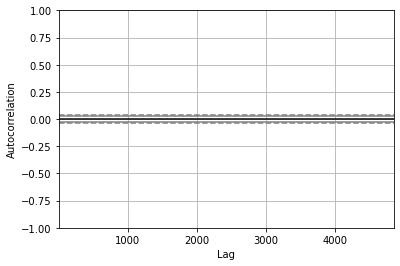

In [70]:
from pandas.plotting import autocorrelation_plot

x = pd.plotting.autocorrelation_plot(btc_data["PriceUSD"])
 
# plotting the Curve
x.plot()
 
# Display
plt.show()

# **Fréquences**

On vérifie l'index du csv pour voir si cela est effectivement la date

In [71]:
btc_data.index

DatetimeIndex(['2009-01-03', '2009-01-04', '2009-01-05', '2009-01-06',
               '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-10',
               '2009-01-11', '2009-01-12',
               ...
               '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10'],
              dtype='datetime64[ns]', name='time', length=4846, freq=None)

On regarde s'il y a des fréquences quotidiennes

In [74]:
daily_data = btc_data.asfreq('D')
daily_data.head()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
time,,,,,,,,,,,,,,,,,,,,,
2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
daily_data.index

NameError: ignored